In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Q2-1

In [3]:
G = nx.Graph()

with open("global-cities.dat", "r", encoding = "utf-8") as f:
    for line in f:
        parts = line.strip().split("|")
        if len(parts) == 3:
            code, num, name = parts
            G.add_node(int(num), label = name)  # Adding nodes

with open("global-net.dat", "r", encoding = "utf-8") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) == 2:
            G.add_edge(int(parts[0]), int(parts[1]))

"""
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_size=20, font_size=6)
plt.show()
"""

print("Number of nodes: ", G.number_of_nodes())
print("Number of nodes: ", G.number_of_edges())

Number of nodes:  3883
Number of nodes:  14142


Q2-2

In [4]:
num_components = nx.number_connected_components(G)

largest_component = max(nx.connected_components(G), key=len)  # Largest component
largest_subgraph = G.subgraph(largest_component)  # Create a subgraph

print("Number of connected components: ", num_components)
print("Number of nodes of largest connected component: ", len(largest_component))
print("Number of edges of largest connected component: ", largest_subgraph.number_of_edges())


Number of connected components:  266
Number of nodes of largest connected component:  3618
Number of edges of largest connected component:  14142


Q2-3

In [5]:
largest_subGraph_degree_dic = dict(largest_subgraph.degree())
sorted_nodes = sorted(largest_subGraph_degree_dic.items() , key=lambda x: x[1], reverse=True)

top_10_nodes = sorted_nodes[:10]
#print(sorted_nodes[:10])

#print(G.nodes[top_10_nodes[0][0]]['label'])

for node in top_10_nodes:
    print("City name:", G.nodes[node[0]]['label'], ", number of nodes:", node[1])

City name: Paris , number of nodes: 250
City name: London (GB) , number of nodes: 242
City name: Frankfurt , number of nodes: 237
City name: Amsterdam , number of nodes: 192
City name: Moscow , number of nodes: 186
City name: Chicago , number of nodes: 184
City name: New York , number of nodes: 179
City name: Atlanta , number of nodes: 172
City name: Dallas/Fort Worth , number of nodes: 147
City name: Houston , number of nodes: 144


Q2-4

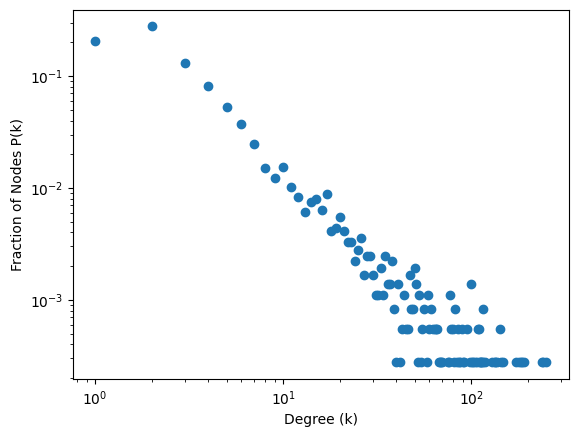

In [6]:
degrees = [d for _, d in largest_subgraph.degree()]
degree_counts = np.bincount(degrees)

num_nodes = len(largest_subgraph)
degree_prob = degree_counts / num_nodes  

valid_degrees = np.nonzero(degree_prob)[0] 
valid_prob = degree_prob[valid_degrees] 

plt.loglog(valid_degrees, valid_prob, marker='o', linestyle='none', base=10)

plt.xlabel("Degree (k)")
plt.ylabel("Fraction of Nodes P(k)")
#plt.title("Degree Distribution (Log-Log Scale)")
#yticks = np.logspace(np.floor(np.log10(min(valid_prob))), np.ceil(np.log10(max(valid_prob))), num=6)
#plt.yticks(yticks, [f"{y:.1e}" for y in yticks])  # Format in scientific notation
plt.show()

Q2-5

In [79]:
diameter = nx.diameter(largest_subgraph)
print(diameter)

all_shortest_paths = dict(nx.all_pairs_shortest_path(largest_subgraph))
city_pair = None

for source in all_shortest_paths:
    for target in all_shortest_paths[source]:
        path = all_shortest_paths[source][target]
        if len(path) - 1 == diameter:  # Check if this path is equal to the diameter
            city_pair = (source, target)
            longest_path = path
            break
        
    if city_pair:
        break

print(" - ".join(G.nodes[node]['label'] for node in longest_path))

17
Brize Norton - Georgetown (XV) - Mount Pleasant - Punta Arenas - Concepcion (CL) - Santiago (CL) - Buenos Aires - Auckland - Brisbane - Port Moresby - Lae - Indagen - Konge - Kabwum - Satwag - Derim - Yalumet - Wasu


Q2-6

In [86]:
for node, data in G.nodes(data=True):
    if(data.get("label") == "Canberra"):
        canberra_node = node
    if(data.get("label") == "Cape Town"):
        cape_town = node


shortest_path_nodes = nx.shortest_path(largest_subgraph, source=canberra_node, target=cape_town)
print("The smallest number of flights from Canberra to Cape Town:", len(shortest_path_nodes)-1)
shortest_path_cities = [G.nodes[n]['label'] for n in shortest_path_nodes]
print(" - ".join(shortest_path_cities))

The smallest number of flights from Canberra to Cape Town: 3
Canberra - Melbourne (AU) - Mauritius - Cape Town


Q2-7

In [88]:
betweenness = nx.betweenness_centrality(largest_subgraph)
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
top_10_betweenness = sorted_betweenness[:10]
for rank, (node, centrality) in enumerate(top_10_betweenness, start=1):
    city_name = largest_subgraph.nodes[node]['label']
    print(f"{rank}. {city_name} - Betweenness values: {centrality:.5f}")

1. Paris - Betweenness values: 0.09342
2. London (GB) - Betweenness values: 0.08499
3. Anchorage - Betweenness values: 0.08152
4. Singapore - Betweenness values: 0.07536
5. New York - Betweenness values: 0.06928
6. Los Angeles (US) - Betweenness values: 0.06625
7. Frankfurt - Betweenness values: 0.06558
8. Port Moresby - Betweenness values: 0.06432
9. Tokyo - Betweenness values: 0.06024
10. Seattle - Betweenness values: 0.05238
